In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/ Twitter_data/russia ukraine war 2000.csv')

In [4]:
df.head()

,Unnamed: 0,user_name,text,hashtags,source
0,0,CarpathianViking,"""Can you imagine, 70-80 years ago, to stop the...",['Hitler'],Twitter for Android
1,1,B C Otto,What #Ukraine and #Russia war teaches us is th...,"['Ukraine', 'Russia']",Twitter for iPhone
2,2,mantse laweh 🇬🇭,RT @moodewji: WARNING: While the #Russia and #...,"['Russia', 'Ukraine', 'Africa']",Twitter for Android
3,3,Alexander Vapirev,RT @lapatina_: Advisor to Mariupol’s mayor say...,"['Ukraine', 'Russia']",Twitter Web App
4,4,Matti Wallin 🇫🇮 🇪🇺🇺🇦,RT @lapatina_: Advisor to Mariupol’s mayor say...,"['Ukraine', 'Russia']",Twitter for iPhone


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2000 non-null   int64 
 1   user_name   1999 non-null   object
 2   text        2000 non-null   object
 3   hashtags    1778 non-null   object
 4   source      2000 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.2+ KB


In [6]:
df.isnull().sum()

Unnamed: 0      0
user_name       1
text            0
hashtags      222
source          0
dtype: int64

In [7]:
df.columns

Index(['Unnamed: 0', 'user_name', 'text', 'hashtags', 'source'], dtype='object')

In [8]:
text_df = df.drop(['Unnamed: 0', 'user_name','hashtags', 'source'], axis=1)
text_df.head()

,text
0,"""Can you imagine, 70-80 years ago, to stop the..."
1,What #Ukraine and #Russia war teaches us is th...
2,RT @moodewji: WARNING: While the #Russia and #...
3,RT @lapatina_: Advisor to Mariupol’s mayor say...
4,RT @lapatina_: Advisor to Mariupol’s mayor say...


In [9]:
#print(text_df['text'].iloc[0],"\n")
#print(text_df['text'].iloc[1],"\n")
#print(text_df['text'].iloc[2],"\n")
#print(text_df['text'].iloc[3],"\n")
#print(text_df['text'].iloc[4],"\n")

In [10]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2000 non-null   object
dtypes: object(1)
memory usage: 15.8+ KB


In [11]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [12]:

text_df.text = text_df['text'].apply(data_processing)

In [13]:
text_df = text_df.drop_duplicates('text')

In [14]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [15]:
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))

In [16]:
text_df.head()

,text
0,imagine 7080 years ago stop war hitler give ti...
1,ukraine russia war teaches us never put 100 tr...
2,rt moodewji warning russia ukraine war continu...
3,rt lapatina_ advisor mariupols mayor says 540 ...
5,rt lesiavasylenko despite war ukraine aspired ...


In [17]:
result = text_df.to_string(index = False)
print(result)

                                                                                                                                                                                                                                                                                                               text
                                                                                                                                                           imagine 7080 years ago stop war hitler give time develop nuclear weapons need adopt approach russia claim ukraine alone nato us afraid deliver f15f16a10
                                                                                                                                                                                                                                   ukraine russia war teaches us never put 100 trust neighbor always defensive plan
                                                                            

In [18]:
#!pip install ntlk

import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
# list of text documents
text = [result]

In [20]:
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)

{'text': 2685, 'imagine': 1324, '7080': 77, 'years': 3012, 'ago': 163, 'stop': 2567, 'war': 2928, 'hitler': 1266, 'give': 1170, 'time': 2734, 'develop': 811, 'nuclear': 1872, 'weapons': 2950, 'need': 1826, 'adopt': 137, 'approach': 256, 'russia': 2317, 'claim': 566, 'ukraine': 2816, 'alone': 204, 'nato': 1812, 'us': 2872, 'afraid': 153, 'deliver': 767, 'f15f16a10': 1003, 'teaches': 2658, 'never': 1840, 'put': 2138, '100': 3, 'trust': 2783, 'neighbor': 1832, 'always': 207, 'defensive': 766, 'plan': 2003, 'rt': 2300, 'moodewji': 1769, 'warning': 2936, 'continues': 649, 'africa': 154, 'struggling': 2587, 'increased': 1346, 'food': 1081, 'prices': 2075, 'higher': 1258, 'cost': 663, 'fe': 1035, 'lapatina_': 1514, 'advisor': 142, 'mariupols': 1657, 'mayor': 1682, 'says': 2371, '540': 70, 'orphans': 1928, 'kept': 1464, 'village': 2902, 'near': 1824, 'russias': 2335, 'rostov': 2297, 'pre': 2058, 'lesiavasylenko': 1546, 'despite': 797, 'aspired': 287, 'green': 1201, 'economy': 894, 'made': 1629

In [21]:
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

(1, 3064)
<class 'scipy.sparse.csr.csr_matrix'>
[[1 1 5 ... 1 1 1]]


In [22]:
import numpy as np
import re

'''The first function we will implement is to extract the words from a document using regular expressions.
 As we do so, we will be converting all words to lower case and exclude our stop words.'''

def tokenize_sentences(sentences):
    words = []
    for sentence in sentences:
        w = extract_words(sentence)
        words.extend(w)
        
    words = sorted(list(set(words)))
    return words

In [23]:
'''Next, we implement our tokenize_sentences function. This function builds our vocabulary by looping through
 all our documents (sentences), extracting the words from each, removing duplicates using the set function and 
 returning a sorted list of words.'''

def extract_words(sentence):
    ignore_words = ['a']
    words = re.sub("[^w]", " ",  sentence).split() #nltk.word_tokenize(sentence)
    words_cleaned = [w.lower() for w in words if w not in ignore_words]
    return words_cleaned   

In [24]:
def bagofwords(sentence, words):
    sentence_words = extract_words(sentence)
    # frequency word count
    bag = np.zeros(len(words))
    for sw in sentence_words:
        for i,word in enumerate(words):
            if word == sw: 
                bag[i] += 1
                
    return np.array(bag)

In [25]:
'''Our last function is the implementation of the bag of words model. This function takes an input of a sentence 
and words (our vocabulary). It then extracts the words from the input sentence using the previously defined function. 
It creates a vector of zeros using numpy zeros function with a length of the number of words in our vocabulary.'''


sentences = [result]

In [26]:
vocabulary = tokenize_sentences(sentences)
bagofwords("Machine learning is great", vocabulary)

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = 5000) 

train_data_features = vectorizer.fit_transform(sentences)

vectorizer.transform([result]).toarray()


array([[1, 1, 5, ..., 1, 1, 1]])

In [27]:
paragraph = result

In [28]:
               
# Cleaning the texts
import re # used for regular expression
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

ps = PorterStemmer()
wordnet=WordNetLemmatizer()
sentences = nltk.sent_tokenize(paragraph)
corpus = []
for i in range(len(sentences)):

  # here we'll substitute or replace everything(i.e ',','/','\' etc.) except word containing a to z and A to Z ([^a-zA-Z]).
    review = re.sub('[^a-zA-Z]', ' ', sentences[i])

    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
    
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500,ngram_range = (1,2))
# cv = CountVectorizer(max_features = 1500,ngram_range = (1,1),stop_words = 'english' )
X = cv.fit_transform(corpus).toarray()
# Creating the TF-IDF model
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
X = cv.fit_transform(corpus).toarray()


In [29]:
X

array([[0.00239989, 0.00719968, 0.00119995, ..., 0.00239989, 0.00119995,
        0.00239989]])

In [30]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 0 to 1997
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    493 non-null    object
dtypes: object(1)
memory usage: 7.7+ KB


In [31]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [32]:
text_df['polarity'] = text_df['text'].apply(polarity)

In [33]:
text_df.head(10)

,text,polarity
0,imagine 7080 years ago stop war hitler give ti...,-0.600000
1,ukraine russia war teaches us never put 100 tr...,0.000000
2,rt moodewji warning russia ukraine war continu...,0.250000
3,rt lapatina_ advisor mariupols mayor says 540 ...,0.100000
5,rt lesiavasylenko despite war ukraine aspired ...,-0.200000
7,drifting mines appeared black sea following uk...,-0.083333
10,rt horpushtaks brucepannier world attention re...,0.033333
15,rt matt_vandyke recently appeared judging free...,0.068182
17,rt f_mols former chancellor became putins man ...,0.000000
21,biden confirms us send ukraine multiple launch...,0.000000


In [34]:
#from google.colab import files
#text_df.to_csv('russia ukraine war pol.csv') 
#files.download('russia ukraine war pol.csv')

In [35]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [36]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [37]:
text_df.head()

,text,polarity,sentiment
0,imagine 7080 years ago stop war hitler give ti...,-0.60,Negative
1,ukraine russia war teaches us never put 100 tr...,0.00,Neutral
2,rt moodewji warning russia ukraine war continu...,0.25,Positive
3,rt lapatina_ advisor mariupols mayor says 540 ...,0.10,Positive
5,rt lesiavasylenko despite war ukraine aspired ...,-0.20,Negative


In [38]:
df.rename(columns={'OldName':'NewName'},
inplace=True)

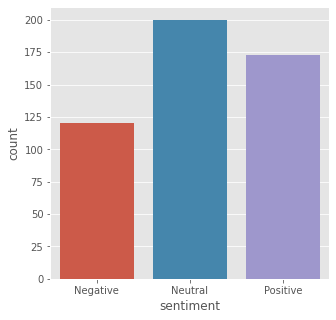

In [39]:

fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

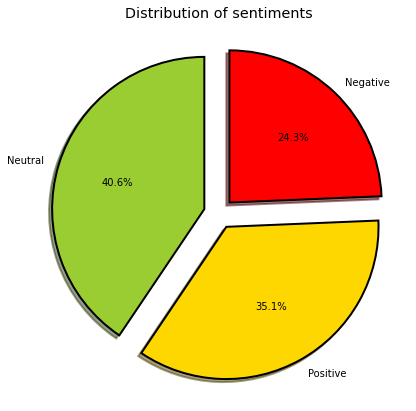

In [40]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [41]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,text,polarity,sentiment
876,excellent oped potus us support ukraine war pu...,1.000,Positive
86,rt steven_pifer excellent oped potus us suppor...,1.000,Positive
942,rt mateuszsobiera3 ukrainian women war brave u...,0.800,Positive
1793,great article comments ukraine successful russ...,0.775,Positive
906,rt jensstoltenberg good meeting šefik džaferov...,0.700,Positive


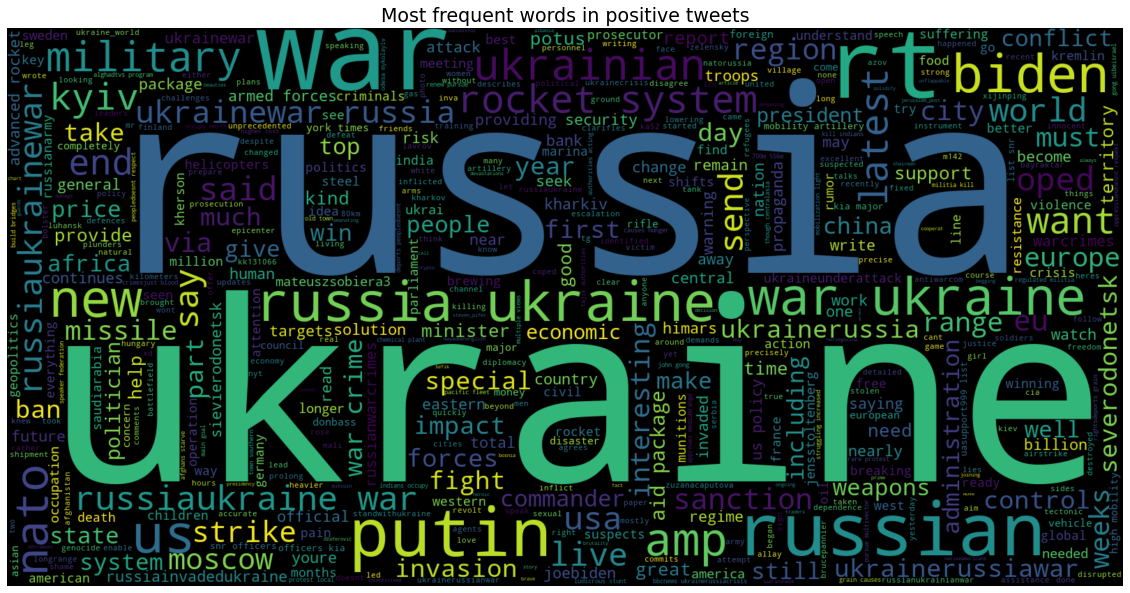

In [42]:
text = ' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [43]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,text,polarity,sentiment
1771,russiaukraine war live updates russia seizes h...,-0.007576,Negative
847,war ukraine rages serbias president announced ...,-0.008333,Negative
1925,rt daily_express ordinary russian soldiers ter...,-0.012500,Negative
988,rt zoonewstv italian air force general leonard...,-0.012500,Negative
306,private opinion russia could destroy ukraine e...,-0.012727,Negative


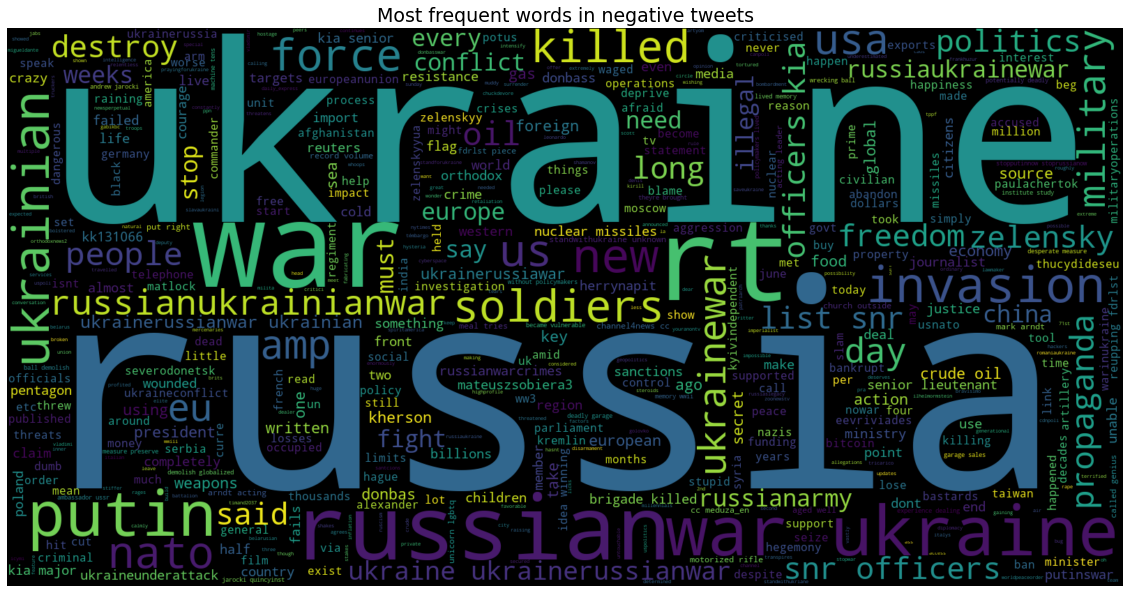

In [44]:
text = ' '.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [45]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,text,polarity,sentiment
1,ukraine russia war teaches us never put 100 tr...,0.0,Neutral
1290,littlegreenmen russia ukraine nato war russian...,0.0,Neutral
1186,ukraine applauds eu ban russianoil imports fig...,0.0,Neutral
1221,rt gngraphicnews ukraine war situation report ...,0.0,Neutral
1234,chinese media reports launch third chinese air...,0.0,Neutral


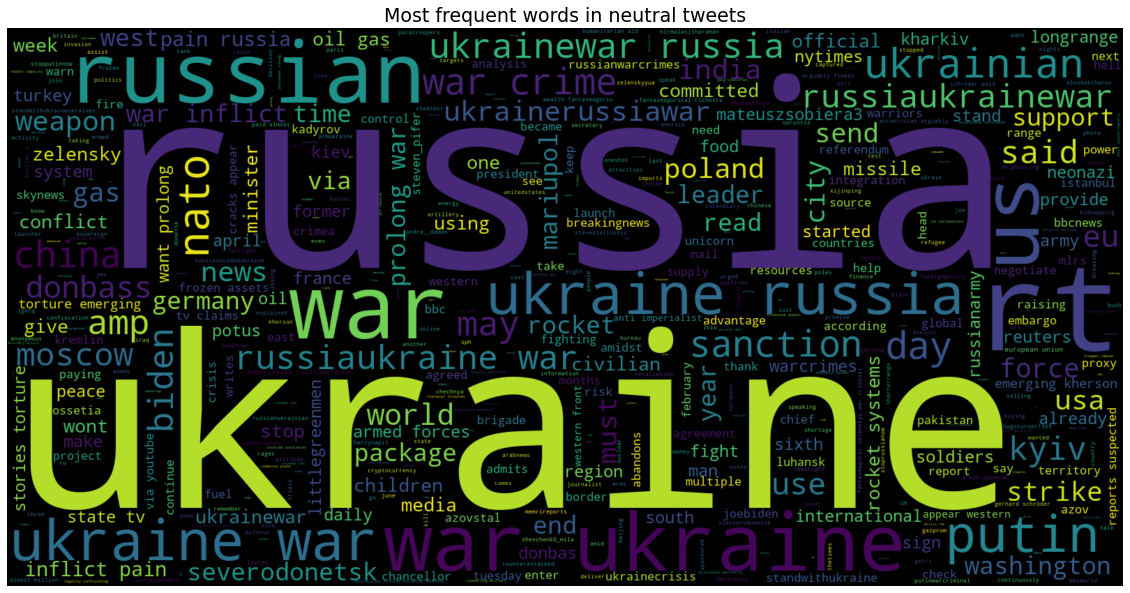

In [46]:
text = ' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [47]:

vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])

In [48]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 9081

First 20 features:
 ['0432', '0432 poland', '06', '06 1248', '10', '10 billion', '10 german', '10 hours', '10 ukrainewar', '100', '100 days', '100 trust', '100s', '100s billions', '100th', '100th day', '1085th', '1085th package', '11', '11 weeks']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [49]:
X = text_df['text']
Y = text_df['sentiment']
X = vect.transform(X)

In [50]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.06, random_state=35)

In [51]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (463, 9081)
Size of y_train: (463,)
Size of x_test: (30, 9081)
Size of y_test: (30,)


In [52]:

import warnings
warnings.filterwarnings('ignore')

In [53]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 73.33%


In [54]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 3  1  1]
 [ 0 15  3]
 [ 1  2  4]]


              precision    recall  f1-score   support

    Negative       0.75      0.60      0.67         5
     Neutral       0.83      0.83      0.83        18
    Positive       0.50      0.57      0.53         7

    accuracy                           0.73        30
   macro avg       0.69      0.67      0.68        30
weighted avg       0.74      0.73      0.74        30



In [55]:
logreg.predict(x_test)

array(['Neutral', 'Neutral', 'Neutral', 'Negative', 'Positive',
       'Positive', 'Positive', 'Negative', 'Neutral', 'Neutral',
       'Neutral', 'Neutral', 'Positive', 'Neutral', 'Negative',
       'Positive', 'Positive', 'Negative', 'Neutral', 'Neutral',
       'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral',
       'Neutral', 'Neutral', 'Positive', 'Neutral'], dtype=object)

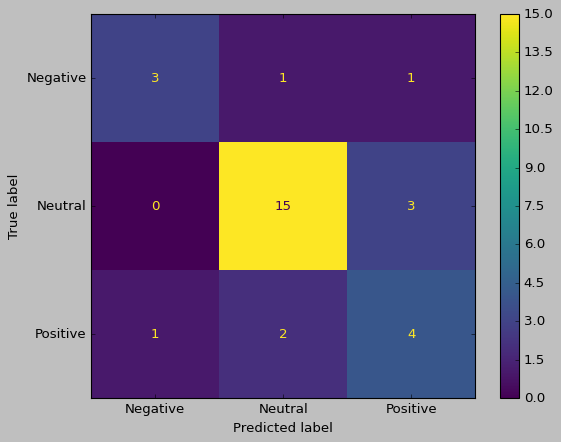

In [56]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [60]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10}


In [61]:
y_pred = grid.predict(x_test)

In [62]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 73.33%


In [63]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 3  1  1]
 [ 0 15  3]
 [ 1  2  4]]


              precision    recall  f1-score   support

    Negative       0.75      0.60      0.67         5
     Neutral       0.83      0.83      0.83        18
    Positive       0.50      0.57      0.53         7

    accuracy                           0.73        30
   macro avg       0.69      0.67      0.68        30
weighted avg       0.74      0.73      0.74        30



In [64]:
from sklearn.svm import LinearSVC

In [65]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [66]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 70.00%


In [67]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[ 3  1  1]
 [ 0 15  3]
 [ 1  3  3]]


              precision    recall  f1-score   support

    Negative       0.75      0.60      0.67         5
     Neutral       0.79      0.83      0.81        18
    Positive       0.43      0.43      0.43         7

    accuracy                           0.70        30
   macro avg       0.66      0.62      0.64        30
weighted avg       0.70      0.70      0.70        30



In [68]:
SVCmodel.predict(x_test)

array(['Neutral', 'Neutral', 'Neutral', 'Negative', 'Positive',
       'Positive', 'Positive', 'Negative', 'Neutral', 'Neutral',
       'Neutral', 'Neutral', 'Positive', 'Neutral', 'Negative', 'Neutral',
       'Positive', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
       'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral',
       'Positive', 'Neutral'], dtype=object)

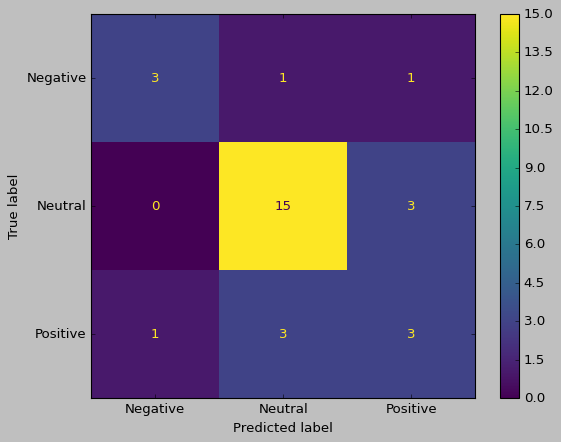

In [69]:
style.use('classic')
cm = confusion_matrix(y_test, svc_pred, labels=SVCmodel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=SVCmodel.classes_)
disp.plot()

In [70]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [71]:
print("Best parameter:", grid.best_params_)

Best parameter: {'C': 0.1}


In [72]:
y_pred = grid.predict(x_test)

In [73]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 73.33%


In [74]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 3  1  1]
 [ 0 15  3]
 [ 1  2  4]]


              precision    recall  f1-score   support

    Negative       0.75      0.60      0.67         5
     Neutral       0.83      0.83      0.83        18
    Positive       0.50      0.57      0.53         7

    accuracy                           0.73        30
   macro avg       0.69      0.67      0.68        30
weighted avg       0.74      0.73      0.74        30



In [75]:
#RANDOM FOREST ALGORITHM
RFgreg= RandomForestClassifier()
RFgreg.fit(x_train, y_train)
RFgreg_pred = RFgreg.predict(x_test)
RFgreg_acc = accuracy_score(RFgreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(RFgreg_acc*100))

Test accuracy: 66.67%


In [76]:
print(confusion_matrix(y_test,  RFgreg_pred))
print("\n")
print(classification_report(y_test, RFgreg_pred))

[[ 1  3  1]
 [ 0 18  0]
 [ 0  6  1]]


              precision    recall  f1-score   support

    Negative       1.00      0.20      0.33         5
     Neutral       0.67      1.00      0.80        18
    Positive       0.50      0.14      0.22         7

    accuracy                           0.67        30
   macro avg       0.72      0.45      0.45        30
weighted avg       0.68      0.67      0.59        30



In [77]:
RFgreg.predict(x_test)

array(['Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
       'Positive', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
       'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Negative',
       'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
       'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral'],
      dtype=object)

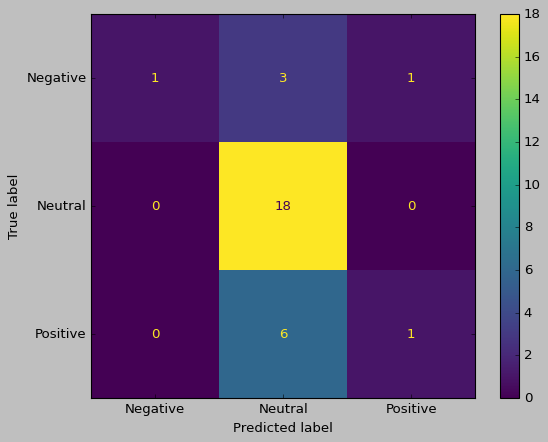

In [78]:
style.use('classic')
cm = confusion_matrix(y_test, RFgreg_pred, labels=RFgreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=RFgreg.classes_)
disp.plot()